In [960]:
import os
os.chdir('C:\\Users\\davia\\OneDrive - Singapore Polytechnic\\SP\\Year 1 Sem 2\\ST1510 (PDAS) Programming for Data Analytics\\CA1\\Datasets')

In [961]:
# Import Modules

import matplotlib.pyplot as plt
import pandas as pd

### How Does Weather Condition Affect Dengue Cases?

In [962]:
# Importing Temperature Data
# https://beta.data.gov.sg/collections/1419/view

meanMonthlyTempData = pd.read_csv('SurfaceAirTemperatureMonthlyMean.csv')

print('Information About Mean Monthly Temperature Dataset', end='\n\n')

print(f'This dataset has {meanMonthlyTempData.shape[0]} rows and {meanMonthlyTempData.shape[1]}', end='\n\n')

print('Column Data:')
for i in meanMonthlyTempData.columns:
    print(f'- Name: {i} | Data Type: {meanMonthlyTempData[i].dtypes} | Amount Of Null Values: {meanMonthlyTempData[i].isnull().sum()}')

print("\nDataset Sample:")
print(meanMonthlyTempData.head(5))

Information About Mean Monthly Temperature Dataset

This dataset has 501 rows and 2

Column Data:
- Name: month | Data Type: object | Amount Of Null Values: 0
- Name: mean_temp | Data Type: float64 | Amount Of Null Values: 0

Dataset Sample:
     month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0


In [963]:
# Importing Dengue Data
# https://beta.data.gov.sg/collections/509/view

dengueCasesData = pd.read_csv('WeeklyNumberofDengueandDengueHaemorrhagicFeverCases.csv')

print('Information About Dengue Cases Dataset', end='\n\n')

print(f'This dataset has {dengueCasesData.shape[0]} rows and {dengueCasesData.shape[1]}', end='\n\n')

print('Column Data:')
for i in dengueCasesData.columns:
    print(f'- Name: {i} | Data Type: {dengueCasesData[i].dtypes} | Amount Of Null Values: {dengueCasesData[i].isnull().sum()}')

print("\nGet the null data:")
print(dengueCasesData[dengueCasesData['number'].isnull()])

print("\nImputing missing data with the number 0")
dengueCasesData['number'].fillna(0, inplace=True)
print(f'Total amount of missing data in number column after imputation: {dengueCasesData["number"].isnull().sum()}')

print("\nDataset Sample:")
print(dengueCasesData.tail(10))

Information About Dengue Cases Dataset

This dataset has 530 rows and 4

Column Data:
- Name: year | Data Type: int64 | Amount Of Null Values: 0
- Name: eweek | Data Type: int64 | Amount Of Null Values: 0
- Name: type_dengue | Data Type: object | Amount Of Null Values: 0
- Name: number | Data Type: float64 | Amount Of Null Values: 8

Get the null data:
     year  eweek type_dengue  number
210  2015     53      Dengue     NaN
211  2015     53         DHF     NaN
316  2016     53      Dengue     NaN
317  2016     53         DHF     NaN
422  2017     53      Dengue     NaN
423  2017     53         DHF     NaN
528  2018     53      Dengue     NaN
529  2018     53         DHF     NaN

Imputing missing data with the number 0
Total amount of missing data in number column after imputation: 0

Dataset Sample:
     year  eweek type_dengue  number
520  2018     49      Dengue   113.0
521  2018     49         DHF     1.0
522  2018     50      Dengue   107.0
523  2018     50         DHF     1.0
524

In [964]:
# Convert Epi Weeks to Months

import datetime

# Copy the dengue dataset
dengueCasesData_copy = dengueCasesData.copy()

# Get all unique years
years = dengueCasesData_copy['year'].unique()

# Group the dataset by year and eweek
dengueCasesGroupBy = dengueCasesData_copy.groupby(['year', 'eweek']).sum().drop('type_dengue', axis=1)

# For each row, get the month which the first day of the epi week falls in and put it in the month column
for i in years:
    first_day = datetime.datetime(i, 1, 1)

    yearData = dengueCasesGroupBy.loc[i]

    for epiweek in yearData.index:
        days_offset = (epiweek - 1) * 7
        first_day_of_week = datetime.datetime.strftime(first_day + datetime.timedelta(days=days_offset - first_day.weekday()), "%m")
        dengueCasesGroupBy.loc[(i, epiweek), 'month'] = f'{i}-{first_day_of_week}'
        if epiweek == 1:
            dengueCasesGroupBy.loc[(i, epiweek), 'month'] = f"{i}-01"

# Group the datset by month
dengueCasesGroupBy = dengueCasesGroupBy.groupby('month').sum()
# Reset the dataset index
dengueCasesGroupBy.reset_index(drop=False, inplace=True)
# Rename the column
dengueCasesGroupBy.rename({"number": "cases"}, axis=1, inplace=True)

# Replace the dengueCasesData with the one that has been converted into months
dengueCasesData = dengueCasesGroupBy

In [965]:
# Importing Monthly Total Rainfall Data
# https://beta.data.gov.sg/collections/1399/view

monthlyTotalRainfallData = pd.read_csv('RainfallMonthlyTotal.csv')

print('Information About Monthly Total Rainfall Dataset', end='\n\n')

print(f'This dataset has {monthlyTotalRainfallData.shape[0]} rows and {monthlyTotalRainfallData.shape[1]}', end='\n\n')

print('Column Data:')
for i in monthlyTotalRainfallData.columns:
    print(f'- Name: {i} | Data Type: {monthlyTotalRainfallData[i].dtypes} | Amount Of Null Values: {monthlyTotalRainfallData[i].isnull().sum()}')

print("\nDataset Sample:")
print(monthlyTotalRainfallData.head(5))

Information About Monthly Total Rainfall Dataset

This dataset has 501 rows and 2

Column Data:
- Name: month | Data Type: object | Amount Of Null Values: 0
- Name: total_rainfall | Data Type: float64 | Amount Of Null Values: 0

Dataset Sample:
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


In [966]:
# Importing pm2.5 Air Pollutent Data
# https://beta.data.gov.sg/collections/1379/view

pm25Data = pd.read_csv('Historical1hrPM2.5.csv')

print('Information About PM 2.5 Dataset', end='\n\n')

print(f'This dataset has {pm25Data.shape[0]} rows and {pm25Data.shape[1]}', end='\n\n')

print('Column Data:')
for i in pm25Data.columns:
    print(f'- Name: {i} | Data Type: {pm25Data[i].dtypes} | Amount Of Null Values: {pm25Data[i].isnull().sum()}')

print("\nDataset Sample:")
print(pm25Data.head(5))

Information About PM 2.5 Dataset

This dataset has 76728 rows and 6

Column Data:
- Name: 1hr_pm2.5 | Data Type: object | Amount Of Null Values: 0
- Name: north | Data Type: int64 | Amount Of Null Values: 0
- Name: south | Data Type: int64 | Amount Of Null Values: 0
- Name: east | Data Type: int64 | Amount Of Null Values: 0
- Name: west | Data Type: int64 | Amount Of Null Values: 0
- Name: central | Data Type: int64 | Amount Of Null Values: 0

Dataset Sample:
       1hr_pm2.5  north  south  east  west  central
0  1/4/2014 1:00      7      6     7    23        8
1  1/4/2014 2:00     10     10    10    36       10
2  1/4/2014 3:00     15     20    15    31       15
3  1/4/2014 4:00     21     14    27    36       12
4  1/4/2014 5:00     28     12    28    35       22


In [967]:
# Importing mean humidity Data
# https://beta.data.gov.sg/collections/1404/view

meanHumidityData = pd.read_csv('RelativeHumidityMonthlyMean.csv')

print('Information About Mean Monthly Humidity Dataset', end='\n\n')

print(f'This dataset has {meanHumidityData.shape[0]} rows and {meanHumidityData.shape[1]}', end='\n\n')

print('Column Data:')
for i in meanHumidityData.columns:
    print(f'- Name: {i} | Data Type: {meanHumidityData[i].dtypes} | Amount Of Null Values: {meanHumidityData[i].isnull().sum()}')

print("\nDataset Sample:")
print(meanHumidityData.head(5))

Information About Mean Monthly Humidity Dataset

This dataset has 501 rows and 2

Column Data:
- Name: month | Data Type: object | Amount Of Null Values: 0
- Name: mean_rh | Data Type: float64 | Amount Of Null Values: 0

Dataset Sample:
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2


### Does surface air temperature affect dengue cases?

#### Check the trend of temperature across the years

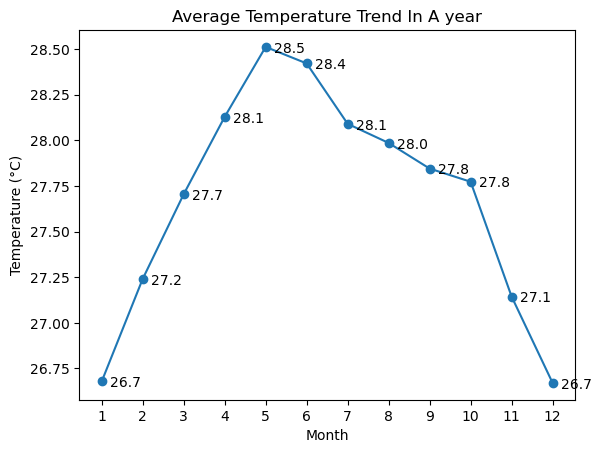

In [968]:
# Copy the dataset so as to not alter the original dataset
meanMonthlyTempData_copy = meanMonthlyTempData.copy()

# Replace the month column so that it is M instead of YYYY-MM
meanMonthlyTempData_copy['month'] = pd.to_datetime(meanMonthlyTempData_copy['month']).dt.month

# Group the dataset by month and get the mean of each month
a = meanMonthlyTempData_copy.groupby('month').mean()

import matplotlib.pyplot as plt

# Plot the dataset
plt.plot(a, marker='o')
plt.xticks(ticks=a.index, labels=a.index)
for i in a.index:
    plt.annotate(f'{round(a.loc[i]["mean_temp"], 1)}', xy=(i+0.2, a.loc[i]['mean_temp']-0.03))
plt.title("Average Temperature Trend In A year")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

We can see that the temperature decreases near the last 3 months of the year to a low of 26.7°C in December and January before rising from January onwards to a high of 28.5°C in August

#### Check the trend of dengue cases

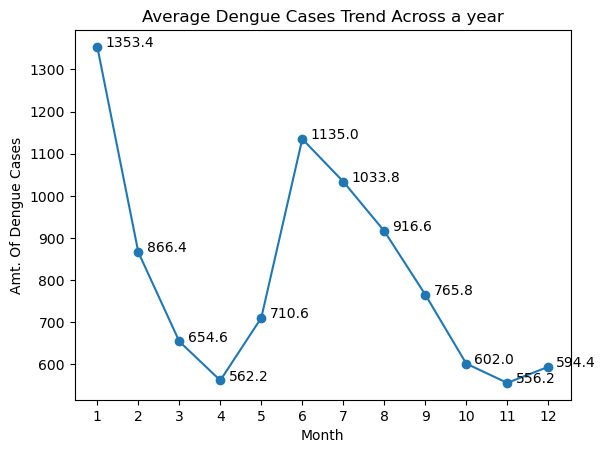

In [969]:
# Copy the dataset so as to not alter the original dataset
dengueCasesData_copy = dengueCasesData.copy()

# Replace the month column so that it is M instead of YYYY-MM
dengueCasesData_copy['month'] = pd.to_datetime(dengueCasesData_copy['month']).dt.month

# Group the dataset by month and get the mean of each month
a = dengueCasesData_copy.groupby('month').mean()

import matplotlib.pyplot as plt

# Plot the dataset
plt.plot(a, marker='o')
plt.xticks(ticks=a.index, labels=a.index)

for i in a.index:
    plt.annotate(f'{round(a.loc[i]["cases"], 1)}', xy=(i+0.2, a.loc[i]['cases']-0.03))

plt.title("Average Dengue Cases Trend Across a year")
plt.xlabel("Month")
plt.ylabel("Amt. Of Dengue Cases")
plt.show()

We can see that dengue cases decreases from January to April and from June to November to a low of 562.2 cases in April while dengue cases rise from April to June and from November to January to a high of 1353.4 cases in January

#### Check relationship between temperature and dengue cases

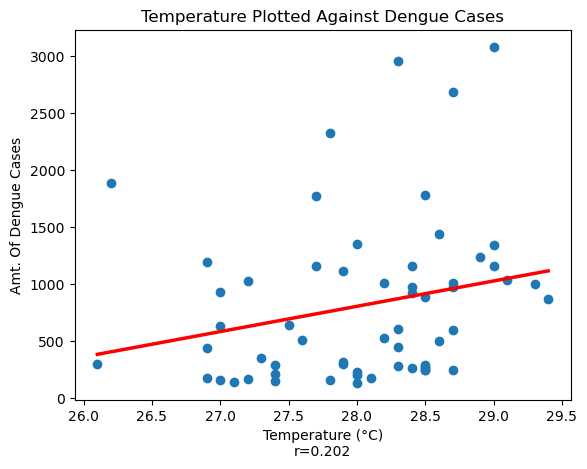

In [970]:
# Inner join the dengue and mean temperature datasets
dengueXmeantempDataset = pd.merge(dengueCasesData, meanMonthlyTempData, on='month', how='inner')

import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter graph
plt.scatter(dengueXmeantempDataset['mean_temp'], dengueXmeantempDataset['cases'])

# Get the best fit line and plot it on the graph
b, a = np.polyfit(dengueXmeantempDataset['mean_temp'], dengueXmeantempDataset['cases'], deg=1)
xseq = np.linspace(dengueXmeantempDataset['mean_temp'].min(), dengueXmeantempDataset['mean_temp'].max(), num=100)
plt.plot(xseq, a + b * xseq, color="red", lw=2.5);

plt.title('Temperature Plotted Against Dengue Cases')
plt.xlabel(f"Temperature (°C)\nr={round(dengueXmeantempDataset[['mean_temp', 'cases']].corr(method='kendall').loc['mean_temp', 'cases'], 3)}")
plt.ylabel('Amt. Of Dengue Cases')

plt.show()

As you can see, there is a weak positive relationship between Surface Air Temperature and Amount Of Dengue Cases

#### Do air quality affect dengue cases?

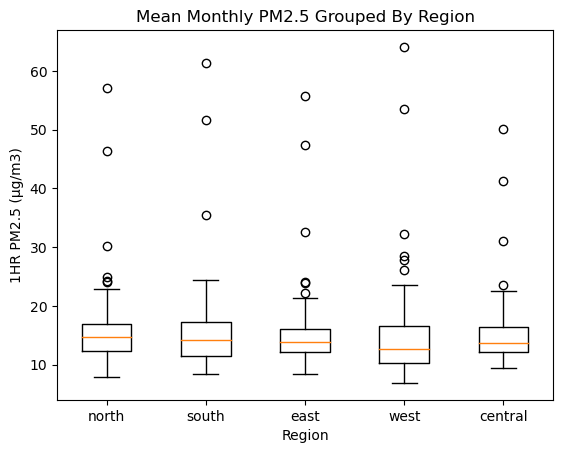

In [971]:
# Copy the dataset so as to not alter the original dataset
pm25Data_copy = pm25Data.copy()

import matplotlib.pyplot as plt

# Convert the 1hr_pm2.5 column into a datetime object
pm25Data_copy['1hr_pm2.5'] = pd.to_datetime(pm25Data_copy['1hr_pm2.5'], format='mixed')
# Set the 1hr_pm2.5 column as the index
pm25Data_copy.set_index('1hr_pm2.5', inplace=True)
# Group all the rows into months and get the mean of each month for each region coloumn
pm25Data_copy = pm25Data_copy[['north', 'south', 'east', 'west', 'central']].resample('M').mean()

# Plot the dataset into a boxplot
plt.boxplot(pm25Data_copy)
plt.title('Mean Monthly PM2.5 Grouped By Region')
plt.ylabel('1HR PM2.5 (µg/m3)')
plt.xlabel('Region')
plt.xticks(ticks=[1,2,3,4,5], labels=pm25Data_copy.columns.values)
plt.show()

The PM2.5 distribution is quite uniform across all regions.
The interquartile range for all columns are in the healthy range.
There are times when the PM2.5 exceeds the healthy range but most of the time it doesn’t exceed the healthy range.

Get the average monthly PM2.5 Reading

In [972]:
pm25Data_copy = pd.DataFrame(pm25Data_copy.mean(axis=1))
pm25Data_copy.reset_index(inplace=True)
pm25Data_copy.rename({'1hr_pm2.5': 'month', 0: 'pm2.5'}, axis=1, inplace=True)
pm25Data_copy['month'] = pm25Data_copy['month'].dt.strftime('%Y-%m')
pm25Data_copy

,month,pm2.5
0,2014-01,17.556279
1,2014-02,21.142593
2,2014-03,21.359259
3,2014-04,21.453704
4,2014-05,15.369345
...,...,...
104,2022-09,11.905833
105,2022-10,8.648387
106,2022-11,9.365278
107,2022-12,9.561290


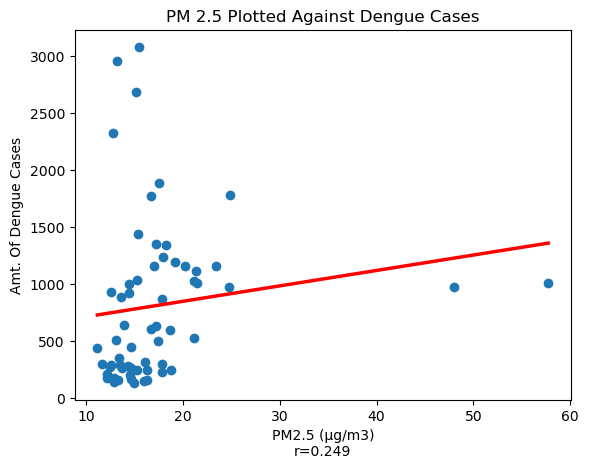

In [973]:
# Inner join the dengue and pm2.5 datasets on the month column
pm25xdengueCasesData = pd.merge(pm25Data_copy, dengueCasesData, on='month', how='inner')

import matplotlib.pyplot as plt

# Plot the dataset on a scatter graph
plt.scatter(pm25xdengueCasesData['pm2.5'], pm25xdengueCasesData['cases'])

# Calculate the bestfit line and plot it and calculate the r correlation score and display it on the x label
b, a = np.polyfit(pm25xdengueCasesData['pm2.5'], pm25xdengueCasesData['cases'], deg=1)
xseq = np.linspace(pm25xdengueCasesData['pm2.5'].min(), pm25xdengueCasesData['pm2.5'].max(), num=100)
plt.plot(xseq, a + b * xseq, color="red", lw=2.5);

plt.title('PM 2.5 Plotted Against Dengue Cases')
plt.xlabel(f"PM2.5 (µg/m3)\nr={round(pm25xdengueCasesData[['pm2.5', 'cases']].corr(method='kendall').loc['pm2.5', 'cases'], 3)}")
plt.ylabel('Amt. Of Dengue Cases')

plt.show()

The graph shows a weak positive correlation between PM2.5 and Amt of Dengue cases, but if the outliers are removed, the graph would suggest a stronger positive correlation between PM2.5 and Amt Of dengue cases.

#### Does Rainfall Affect Dengue Cases?

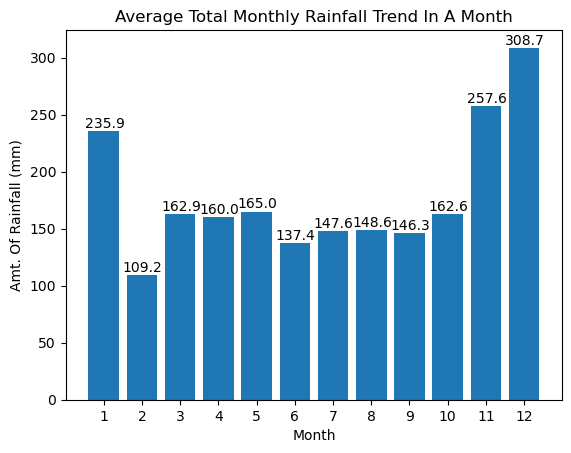

In [974]:
# Copy the dataset so as to not alter the original dataset
monthlyTotalRainfallData_copy = monthlyTotalRainfallData.copy()

# Replace the month column so that it is M instead of YYYY-MM
monthlyTotalRainfallData_copy['month'] = pd.to_datetime(monthlyTotalRainfallData_copy['month']).dt.month

# Group the dataset by month and get the mean of each month
a = monthlyTotalRainfallData_copy.groupby('month').mean()

import matplotlib.pyplot as plt

# Plot the dataset onto a bar chart
plt.bar(x=a.index, height=a['total_rainfall'])
plt.xticks(ticks=a.index, labels=a.index)
for i in a.index:
    plt.annotate(f'{round(a.loc[i]["total_rainfall"], 1)}', xy=(i-0.5, a.loc[i]['total_rainfall']+3))
plt.title("Average Total Monthly Rainfall Trend In A Month")
plt.xlabel("Month")
plt.ylabel("Amt. Of Rainfall (mm)")
plt.show()

The monthly rainfall total increases at the end of the year from October to December to a high of 308.7mm in December before decreasing to a low of 109.2mm in February.
The monthly rainfall total remains nearly the same throughout the rest of the year between 137.4mm to 165.0mm

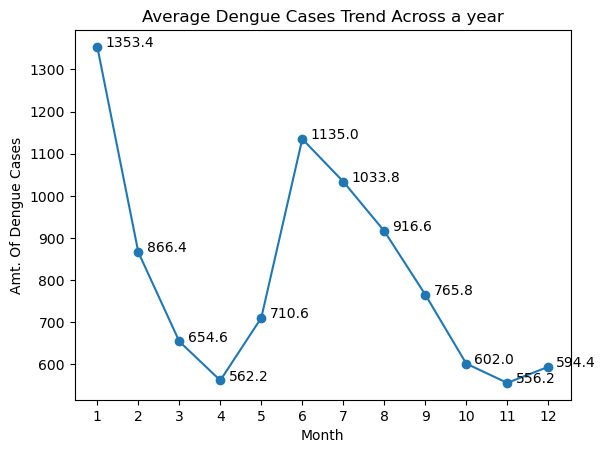

In [975]:
# # Copy the dataset so as to not alter the original dataset
dengueCasesData_copy = dengueCasesData.copy()

dengueCasesData_copy['month'] = pd.to_datetime(dengueCasesData_copy['month']).dt.month

a = dengueCasesData_copy.groupby('month').mean()

import matplotlib.pyplot as plt

plt.plot(a, marker='o')
plt.xticks(ticks=a.index, labels=a.index)

for i in a.index:
    plt.annotate(f'{round(a.loc[i]["cases"], 1)}', xy=(i+0.2, a.loc[i]['cases']-0.03))

plt.title("Average Dengue Cases Trend Across a year")
plt.xlabel("Month")
plt.ylabel("Amt. Of Dengue Cases")
plt.show()

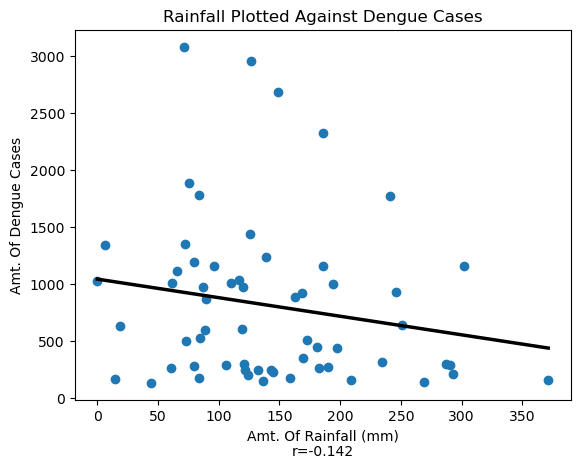

In [976]:
# Inner join the monthly total rainfall data and dengue cases datasets

monthlyTotalRainfallData_copyXdengueCasesData_copy = pd.merge(dengueCasesData, monthlyTotalRainfallData, on='month', how='inner')

import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter graph
plt.scatter(monthlyTotalRainfallData_copyXdengueCasesData_copy['total_rainfall'], monthlyTotalRainfallData_copyXdengueCasesData_copy['cases'])

# Calculate the bestfit line and plot it and calculate the r correlation score and display it on the x label
b, a = np.polyfit(monthlyTotalRainfallData_copyXdengueCasesData_copy['total_rainfall'], monthlyTotalRainfallData_copyXdengueCasesData_copy['cases'], deg=1)
xseq = np.linspace(monthlyTotalRainfallData_copyXdengueCasesData_copy['total_rainfall'].min(), monthlyTotalRainfallData_copyXdengueCasesData_copy['total_rainfall'].max(), num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

plt.title('Rainfall Plotted Against Dengue Cases')
plt.xlabel(f"Amt. Of Rainfall (mm)\nr={round(monthlyTotalRainfallData_copyXdengueCasesData_copy[['total_rainfall', 'cases']].corr(method='kendall').loc['total_rainfall', 'cases'], 3)}")
plt.ylabel('Amt. Of Dengue Cases')

plt.show()

The graph suggests a weak negative relationship between rainfall and amt of dengue cases
This is unexpected as it is normally thought that more rainfall would lead to more dengue cases due to increased breeding ground
With that said, rainfall and dengue cases have similar trends, peaking at nearly at same time as each other throughout the year.


#### How does humidity affect dengue case?

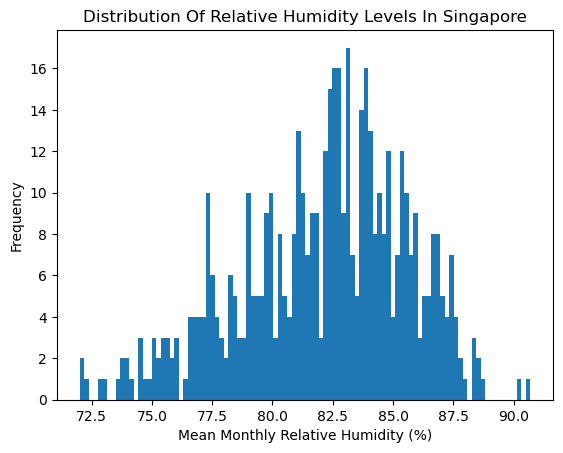

In [977]:
import matplotlib.pyplot as plt

# Plot the graph onto a histogram
plt.hist(meanHumidityData['mean_rh'], bins=100)
plt.xlabel('Mean Monthly Relative Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution Of Relative Humidity Levels In Singapore')

plt.show()

The distribution of humidity levels is negatively skewed.
The humidity levels mainly group around 77.5% to 87.5% 
The most frequent humidity level is around 83.5%


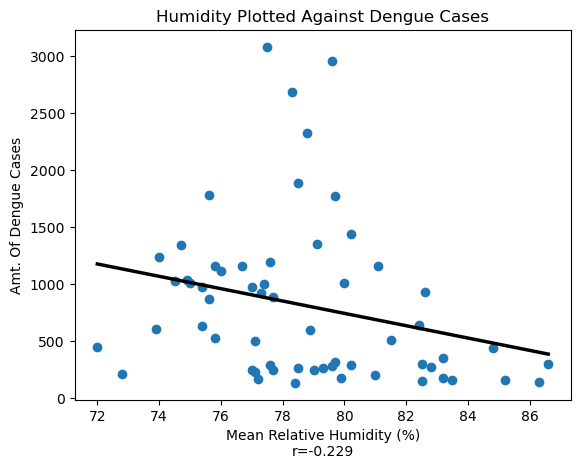

In [978]:
# Inner join the mean humidity data and dengue cases datasets
meanHumidityData_copyXdengueCasesData_copy = pd.merge(dengueCasesData, meanHumidityData, on='month', how='inner')

import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter graph
plt.scatter(meanHumidityData_copyXdengueCasesData_copy['mean_rh'], meanHumidityData_copyXdengueCasesData_copy['cases'])

# Calculate the bestfit line and plot it and calculate the r correlation score and display it on the x label
b, a = np.polyfit(meanHumidityData_copyXdengueCasesData_copy['mean_rh'], meanHumidityData_copyXdengueCasesData_copy['cases'], deg=1)
xseq = np.linspace(meanHumidityData_copyXdengueCasesData_copy['mean_rh'].min(), meanHumidityData_copyXdengueCasesData_copy['mean_rh'].max(), num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

plt.title('Humidity Plotted Against Dengue Cases')
plt.xlabel(f"Mean Relative Humidity (%)\nr={round(meanHumidityData_copyXdengueCasesData_copy[['mean_rh', 'cases']].corr(method='kendall').loc['mean_rh', 'cases'], 3)}")
plt.ylabel('Amt. Of Dengue Cases')

plt.show()

From our insights, we can conclude that an increase in temperature and worser air quality leads to an increase in dengue cases.
However, an increase in rainfall and humidity levels leads to a decrease in dengue cases.
